# Project 1: Navigation

This notebook provides the main part of code for training the agent. Beyond this notebook, the Python files 'actionvalue_estimators.py' and 'deepqnet_agent.py' are necessary for successfully solving this navigation project.

### 1. Set the framework

First, load necessary packages.

In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt
from unityagents import UnityEnvironment
from collections import deque
from deepqnet_agent import Agent

Now, start the environment.

In [2]:
env = UnityEnvironment(file_name="C:/Users/DNEUHAE/Desktop/DRL/p1_navigation/Banana_Windows_x86_64/Banana.exe")

# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


### 2. Initialize the agent

In [3]:
from actionvalue_estimators import QNetwork_2Hidden, QNetwork_3Hidden 

# extract size information for action space and state space  
action_size = brain.vector_action_space_size
state_size = brain.vector_observation_space_size

Now, we initialize two agents. The first one has a Q-Network with 2 hidden layers, the second one with 3 hidden layers. Thus, the difference is the architecture of the neural net approximating the action-value function.

In [5]:
agent_via_2layers = Agent(action_size=action_size, state_size=state_size, seed=0, qnetwork=QNetwork_2Hidden)
agent_via_3layers = Agent(action_size=action_size, state_size=state_size, seed=0, qnetwork=QNetwork_3Hidden)

### 3. Train the agents via Deep Q-Learning

In [6]:
def dqn(n_episodes, max_t, eps_start, eps_end, eps_decay, agent, pth_filename):
    """
    Deep Q-learning
    
    Params
    ======
        n_episodes (int): number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy policy 
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) to decrease epsilon
        agent (Agent object): Agent with Q-network via 2 or 3 hidden layers 
        pth_filename (str): name for the '*.pth'-file
    """
    
    scores = []                                                  # list containing scores from each episode                 
    scores_window = deque(maxlen=100)                            # store only the last 100 scores
    eps = eps_start                                              # initialize epsilon (for epsilon-greedy policy)
    agent = agent                                                # specify if agent's q-network has 2 or 3 hidden layers

    for n_episode in range(1, n_episodes + 1):                   # run n_episodes
        env_info = env.reset(train_mode=True)[brain_name]        # reset the environment
        state = env_info.vector_observations[0]                  # get the initial state
        score = 0                                                # initialize the score
        
        for t in range(max_t):                                   # run for maximum of max_t timesteps 
            action = agent.act(state, eps)                       # select the action
            action = action.astype(np.int32)                     # if not casted: AttributeError: 'numpy.int64' object has no attribute 'keys'
            env_info = env.step(action)[brain_name] 
            next_state = env_info.vector_observations[0]         # get the state
            reward = env_info.rewards[0]                         # get the reward
            done = env_info.local_done[0]                        # is the episode is complete or not
            
            agent.step(state, action, reward, next_state, done)  # train the agent 
            score += reward                                      # update the score
            
            state = next_state                                   # update the state
            if done:                                             # break if episode is complete
                break
        
        scores_window.append(score)                              # update the window of scores
        scores.append(score)                                     # update the list of scores
        eps = max(eps_end, eps * eps_decay)                      # modify epsilon
        average_score = np.mean(scores_window)
        
        print('\rEpisode {} \tAverage score: {: .2f}'.format(n_episode, average_score), end="")
        
        if n_episode % 100 == 0:
            print('\rEpisode {} \tAverage score: {: .2f}'.format(n_episode, average_score))
            
        if average_score >= 13:      # check if environment is solved
            print('\nEnvironment solved in {: d} episodes!\tAverage Score: {: .2f}'.format(n_episode - 100, average_score))
            torch.save(agent.qnetwork_local.state_dict(), pth_filename)
            break
    
    return scores 

Next, choose parameters for the function 'dqn()'.

In [7]:
n_episodes = 5000
max_t = 2000
eps_start = 1.0
eps_end = 0.1
eps_decay = 0.99

#### 3.1 Agent via 2 hidden layers in Q-network

In [8]:
scores = dqn(n_episodes, max_t, eps_start, eps_end, eps_decay, agent=agent_via_2layers, pth_filename='agent_via_2layers.pth')

Episode 100 	Average score:  1.87
Episode 200 	Average score:  7.22
Episode 300 	Average score:  10.35
Episode 400 	Average score:  11.47
Episode 487 	Average score:  13.01
Environment solved in  387 episodes!	Average Score:  13.01


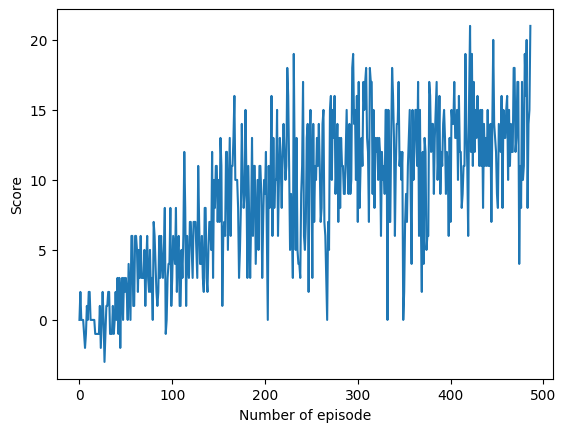

In [9]:
# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Number of episode')
plt.savefig('C:/Users/DNEUHAE/Desktop/DRL/p1_navigation/dqn_2layers_scores.png', bbox_inches='tight')
plt.show()

#### 3.2 Agent via 3 hidden layers in Q-network

In [12]:
scores = dqn(n_episodes, max_t, eps_start, eps_end, eps_decay, agent=agent_via_3layers, pth_filename='agent_via_3layers.pth')

Episode 100 	Average score:  3.38
Episode 200 	Average score:  9.32
Episode 300 	Average score:  12.18
Episode 400 	Average score:  12.03
Episode 500 	Average score:  12.31
Episode 600 	Average score:  12.24
Episode 689 	Average score:  13.01
Environment solved in  589 episodes!	Average Score:  13.01


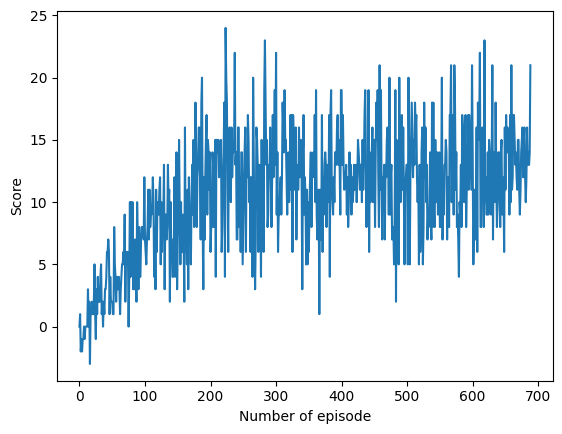

In [13]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Number of episode')
plt.savefig('C:/Users/DNEUHAE/Desktop/DRL/p1_navigation/dqn_3layers_scores.png', bbox_inches='tight')
plt.show()

### 4. Load trained agents and see models in action

In [14]:
agent_via_2layers.qnetwork_local.load_state_dict(torch.load('C:/Users/DNEUHAE/Desktop/DRL/p1_navigation/agent_via_2layers.pth'))
#agent_via_3layers.qnetwork_local.load_state_dict(torch.load('C:/Users/DNEUHAE/Desktop/DRL/p1_navigation/agent_via_3layers.pth'))

<All keys matched successfully>

In [15]:
env_info = env.reset(train_mode=False)[brain_name] # reset the environment
state = env_info.vector_observations[0]            # get the current state
score = 0                                          # initialize the score
agent = agent_via_2layers                          # specify if agent's q-network has 2 or 3 hidden layers

while True:
    action = agent.act(state)                      # select next action
    action = action.astype(np.int32)               # if not casted: AttributeError: 'numpy.int64' object has no attribute 'keys'
    env_info = env.step(action)[brain_name]        # send the action to the environment
    next_state = env_info.vector_observations[0]   # get next state
    reward = env_info.rewards[0]                   # get reward
    done = env_info.local_done[0]                  # see if episode has finished
    score += reward                                # update score by reward
    state = next_state                             # roll over the state to next time step
    if done:                                       # exit loop if episode finished
        break
    
print("Score: {}".format(score))

Score: 16.0


In [16]:
env.close()